# Dynamic Resonances

This notebook shows how to obtain dynamic resonances from the discrete resonance spectrogram of a signal.

## 1. Imports

First we import the library of functions.

In [2]:
from utilities_store import *

## 2. Obtain spectrogram of the signal

First we obtain the spectrogram of the signal.

In [3]:
spectrogram, signal = get_spectrogram('tester.wav', N = 500, step_size = 250, 
                                          power_threshold = 1e-9, amp_threshold = 1e-8)

Progress: 0.00%
Progress: 0.81%
Progress: 1.62%
Progress: 2.42%
Progress: 3.23%
Progress: 4.04%


/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:224: RuntimeWarning: overflow encountered in power
  Z = np.power(self.zs.reshape(-1, 1), exponent)
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:234: RuntimeWarning: invalid value encountered in matmul
  d = np.divide(Z @ ps[1:].reshape(-1, 1),
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:235: RuntimeWarning: overflow encountered in matmul
  Z @ (qs[1:] * i).reshape(-1, 1))
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:235: RuntimeWarning: invalid value encountered in matmul
  Z @ (qs[1:] * i).reshape(-1, 1))
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:234: RuntimeWarning: invalid value encountered in divide
  d = np.divide(Z @ ps[1:].reshape(-1, 1),
/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/resonance.py:215: RuntimeWarning: overflow encountered in cdouble_scalars
  d_ = self.d * self.z ** (self.N - 1)
/

Progress: 4.85%
Progress: 5.66%
Progress: 6.46%
Progress: 7.27%
Progress: 8.08%
Progress: 8.89%
Progress: 9.70%
Progress: 10.50%
Progress: 11.31%
Progress: 12.12%
Progress: 12.93%
Progress: 13.74%
Progress: 14.54%
Progress: 15.35%
Progress: 16.16%
Progress: 16.97%
Progress: 17.78%
Progress: 18.58%
Progress: 19.39%
Progress: 20.20%
Progress: 21.01%
Progress: 21.82%
Progress: 22.62%
Progress: 23.43%
Progress: 24.24%
Progress: 25.05%
Progress: 25.86%
Progress: 26.66%
Progress: 27.47%
Progress: 28.28%


/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/resonance.py:265: RuntimeWarning: invalid value encountered in cdouble_scalars
  return replace(self, d=self.d * self.z ** offset)


Progress: 29.09%
Progress: 29.90%


/Users/nastysushi/Mirror/_MULTIMEDIA/THESIS/thesis/github/fpt/fpt.py:234: RuntimeWarning: overflow encountered in matmul
  d = np.divide(Z @ ps[1:].reshape(-1, 1),


Progress: 30.70%
Progress: 31.51%
Progress: 32.32%
Progress: 33.13%
Progress: 33.94%
Progress: 34.74%
Progress: 35.55%
Progress: 36.36%
Progress: 37.17%
Progress: 37.98%
Progress: 38.78%
Progress: 39.59%
Progress: 40.40%
Progress: 41.21%
Progress: 42.02%
Progress: 42.82%
Progress: 43.63%
Progress: 44.44%
Progress: 45.25%
Progress: 46.06%
Progress: 46.86%
Progress: 47.67%
Progress: 48.48%
Progress: 49.29%
Progress: 50.10%
Progress: 50.90%
Progress: 51.71%
Progress: 52.52%
Progress: 53.33%
Progress: 54.14%
Progress: 54.94%
Progress: 55.75%
Progress: 56.56%
Progress: 57.37%
Progress: 58.18%
Progress: 58.98%
Progress: 59.79%
Progress: 60.60%
Progress: 61.41%
Progress: 62.22%
Progress: 63.02%
Progress: 63.83%
Progress: 64.64%
Progress: 65.45%
Progress: 66.26%
Progress: 67.06%
Progress: 67.87%
Progress: 68.68%
Progress: 69.49%
Progress: 70.30%
Progress: 71.10%
Progress: 71.91%
Progress: 72.72%
Progress: 73.53%
Progress: 74.34%
Progress: 75.14%
Progress: 75.95%
Progress: 76.76%
Progress: 77.5

Plot the original resonance spectrogram.

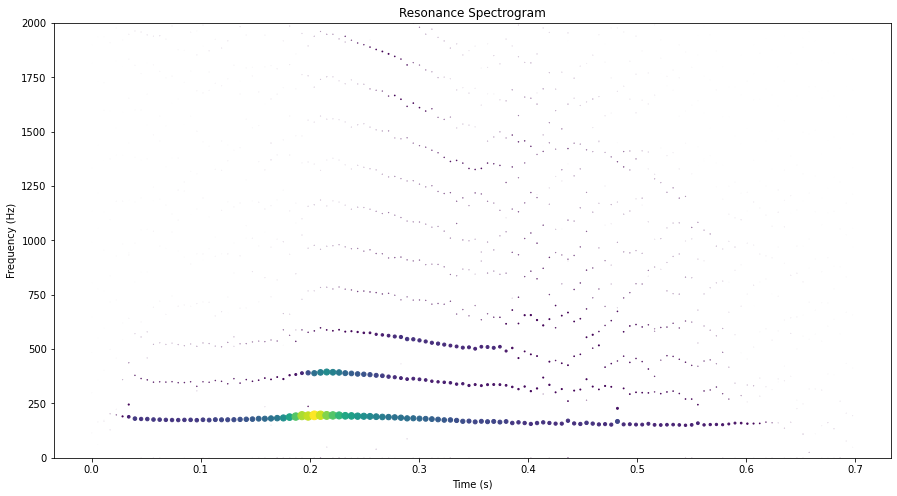

In [4]:
plot_spectrogram(spectrogram, max_freq = 2000, scale=100)

## 3. Obtain the dynamic resonances

Next we obtain the dynamic resonances. The main parameter of this function is the distance measure. This parameter defines the formula used to calculate the distance (spectral similarity) between two resonances. We have developped six different distance measures:

    - Frequency distance.
    - Harmonic mean of the dk and wk coefficients.
    - Residue of the product of the resonances.
    - Residue of the product of the resonances weighted by power.
    - Residue of the product of the resonances multiplied by the spectra transference function.
    - Residue of the product of the resonances multiplied by the spectra transference function weighted by power.
    
In this example we use the Residue Power distance measure to obtain the dynamic resonances.

In [4]:
dyns = get_dynamic_resonances(spectrogram, min_overlap = 1e-15, overlap_type = "exponential", freq_ratio = 15, 
                              mode = 'forward', multiple_match = False, distance = 'residue_power')

AttributeError: 'Resonance' object has no attribute 'max_duration'

Plot the dynamic resonances:

In [6]:
plot_dynamic(spectrogram, dyns, max_freq = 2000, size = 'power')

NameError: name 'dyns' is not defined

## 4. Extend dynamic resonances

Dynamic resonances can be extended with "correcting" resonances that reduce the discontinuitis in the recontruction at the edge of the windows. There exist three methods to extend dynamic resonances:

    - Extension by amplitude correction in the time signal
    - Extension by phase correction in the time signal
    - Extension by decay coefficient. The dynamic resonance is extended with all the resonances in the candidates 
    range that point inwards (damping above center resonance, ramping below center resonance) if the dynamic resonance is 
    decreasing in frequency and vice versa. 

In [ ]:
new_dyns = extend_dynamic_res(spectrogram, dyns, step_size = 250, extension_type = 'amplitude',  ratio = 1.3)

../resonance.py:298: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  els = np.array([store[el] for el in self._elements])


Plot the extended dynamic resonances

In [ ]:
plot_dynamic(spectrogram, new_dyns, max_freq = 2000, size = 'power')